<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Мы можем заметить, что в некоторых столбцах много пропущеных данных. Необходимо разобраться, с чем это связано и насколько эти пропуски критичны для работы. По взможности заполнить пропуски.

Также необходимо перевести данные из столбца *first_day_exposition* в формат даты для более удобного взаимодействия.

## Предобработка данных

Рассмотрим пропуски в данных. Начнем со столбца *ceiling_height* - высота потолков (м). Пропуски данных в этом столбце можно объяснить тем, что далеко не все считают эту информацию необходимой и важной. Пропуски в этих данных можно оставить и в дальнейшем, если нам будет необходимо рассматривать зависимость от высоты потолков, будем смотреть только квартиры с указанными значениями.

Далее видим пропуски в данных в столбце *floors_total* - всего этажей в доме. Интересно, почему эти данные пропущенны. Выведем на экран первые 10 строк с пропусками и посмотрим, все ли в порядке с остальными данными.

In [4]:
data[data['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,NaN,NaN,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,NaN,NaN,29.00,22,NaN,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,NaN,NaN,19.40,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,NaN,NaN,22.20,6,NaN,...,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,NaN,NaN,32.00,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Кроме пропусков в значении этажей в доме, остальные данные выглядят достаточно полными. Необходимо разобраться, почему отсутствует эта информация: это может быть ошибка в выгрузке или неполное предоставление информации. В обоих случаях нужно проделать работу по устарнении таких пропусков в дальнейшем, так как данная информация необходима для понимания категории квартиры: находится она на первом, последнем или же каком-то другом этаже.

Создадим новый столбец *floor_kind*, в котором укажем категорию квартиры по отношению к положению ее в доме:
* первый
* последний
* другое - остальные этажи

Так как количество квартир с неизвестной нам этажностью здания крайне мал (всего 0,36% от всех квартир), будем считать, что такие квартиры находятся не на последнем этаже.

In [5]:
def fill_floor_kind(row):
    if row['floor'] == 1:
        return('первый')
    if row['floor'] == row['floors_total']:
        return('последний')
    return('другое')

data['floor_kind'] = data.apply(fill_floor_kind, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_kind
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,другое
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,первый
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,другое
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,другое
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,другое


Проверим, как сработал код для квартир с неизвестной этажностью домов.

In [6]:
data[data['floors_total'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_kind
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0,другое
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,первый
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0,другое
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0,другое
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0,другое
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,NaN,NaN,NaN,4,NaN,...,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0,другое
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,NaN,NaN,29.00,22,NaN,...,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0,другое
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,NaN,NaN,19.40,15,NaN,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0,другое
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,NaN,NaN,22.20,6,NaN,...,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN,другое
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,NaN,NaN,32.00,12,NaN,...,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0,другое


Все в порядке: для квартиры на первом этаже мы выбрали вид "первый", для остальны - "другое".

Далее рассмотрим пропуски в столбце *living_area* - жилая площадь в квадратных метрах(м²). Это также важная величина, на отстутвие которой стоит обратить внимание  и разобраться с причинами. 

Сделаем отдельный столбец *living_area_check* (булев.), где будет указано, было ли первоначально предоставлена информация о жилой площади квартиры. Это поможет в дальнейшем посмотреть насколько сильно эти данные влияют на общую картину.

In [7]:
def fill_living_area_check(row):
    if row['living_area'] > 0:
        return(True)
    return(False)

data['living_area_check'] = data.apply(fill_living_area_check, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_kind,living_area_check
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,другое,True
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,первый,True
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,другое,True
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,другое,False
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,другое,True


Теперь заполним пропуски как медианное значение по остальным квартирам с соотвтетствующим количеством комнат. Создадим функцию, считающую медианное значение жилой площади квартиры в зависимости от количества комнат и применим ее ко всем квартирам с пустой площадью.

In [8]:
def median_living_area(room):
    return(data[(data['rooms'] == room) & (~data['living_area'].isna())]['living_area'].median())

In [9]:
for i in range(len(data['rooms'])):
    if ~(data.loc[i, 'living_area'] == data.loc[i, 'living_area']): #проверяем, что значение Nan
        data.loc[i, 'living_area'] = median_living_area(data.loc[i, 'rooms'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Пропуски в жилой площади квартиры устранены.

Теперь рассмотрим столбец *is_apartment* - апартаменты (булев тип). посмотрим уникальные значения.

In [11]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Судя по всему, пустые значения - это индикатор того, что квартира не является апартаментами. Заменим все пропуски на *False*.

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Следующий столбец на очереди: *kitchen_area* - площадь кухни в квадратных метрах (м²). В отличие от жилой площади квартиры, площадь кухни обычно не зависит от количества комнат. Пропущенных значений достаточно много, на что следует обратить внимание.

Аналогично ситуации с жилой площадью квартиры, создадим столбец *kitchen_area_check*, где оставим информацию о том, была ли первоначально предоставлена информация о площади кухни. Все пропущенные значения *kitchen_area* заполним как медианные.

In [13]:
def fill_kitchen_area_check(row):
    if row['kitchen_area'] > 0:
        return(True)
    return(False)

data['kitchen_area_check'] = data.apply(fill_kitchen_area_check, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_kind,living_area_check,kitchen_area_check
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,другое,True,True
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,первый,True,True
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,другое,True,True
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,45.0,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,другое,False,False
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,другое,True,True


In [14]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

Теперь интересно проверить, есть ли связь между тем, указана ли жилая площадь квартиры и площадь кухни.

In [15]:
no_area_data = 0
for i in range(len(data['living_area_check'])):
    if (data.loc[i, 'living_area_check'] == False & data.loc[i, 'kitchen_area_check'] == False):
        no_area_data += 1

print('Отсутствующих данных о жилой площади квартиры:', data[data['living_area_check'] == False]['living_area_check'].count())
print('Отсутствующих данных о площади кухни:', data[data['kitchen_area_check'] == False]['kitchen_area_check'].count())
print('Отсутствующих данных о жилой площади и площади кухни:', no_area_data)

Отсутствующих данных о жилой площади квартиры: 1903
Отсутствующих данных о площади кухни: 2278
Отсутствующих данных о жилой площади и площади кухни: 1903


In [16]:
data.query('living_area_check.isna() and kitchen_area_check.isna()').shape[0]

0

Можно сделать вывод, что во всех квартирах, где не была указана информация о жилой площади квартиры, также отстутвует информация о метраже кухни. С чем это связано? Возможно, это некорректные объявления или же произошла ошибка при выгрузках.

Далее рассмотрим *balcony* - число балконов.
Посомтрим уникальные значения.

In [17]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Можем заметить что во-первых, у нас есть пропущенные значения. Скорее всего это означает отсутствие балконов в квартире, так что мы смело можем заменить их на 0.

Также данные представлены в формате float, что для оличества балконов не необходимо. Изменим тип данных на int.

In [18]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

Рассмотрим *days_exposition* - сколько дней было размещено объявление (от публикации до снятия). Эта информация должна быть в системе. Посмотрим, сколько значений пропущено и 10 первых таких квартир.

In [19]:
data['days_exposition'].isna().sum()

3181

In [20]:
data[data['days_exposition'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,floor_kind,living_area_check,kitchen_area_check
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,другое,True,True
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,30.50,22,False,...,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,другое,False,True
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,17.60,3,False,...,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,другое,False,False
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.30,7,False,...,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN,другое,True,True
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.70,9,False,...,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN,другое,True,True
49,1,3050000.0,30.8,2018-11-22T00:00:00,1,2.50,9.0,18.00,7,False,...,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN,другое,True,True
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.00,2.0,94.00,2,False,...,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN,последний,True,True
71,20,4850000.0,57.5,2019-03-27T00:00:00,3,2.50,9.0,39.00,8,False,...,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN,другое,True,True
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,NaN,10.0,17.60,6,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,другое,False,False
84,11,2400000.0,43.9,2019-03-13T00:00:00,2,NaN,2.0,27.46,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,первый,True,True


В целом данные выглядят адекватными, то есть это не какие-то ошибочные строки. Необходимо передать информацию об этом коллегам, занимающимся выгрузками, чтобы понять, в чем дело.

Посмотрим уникальные значения даты объявления, возможно, все пустые строки были в один день (системный сбой).

In [21]:
data[data['days_exposition'].isna()]['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2019-04-18T00:00:00',
       '2018-11-18T00:00:00', '2018-12-02T00:00:00',
       '2019-01-31T00:00:00', '2018-11-22T00:00:00',
       '2017-09-22T00:00:00', '2019-03-27T00:00:00',
       '2018-12-27T00:00:00', '2019-03-13T00:00:00',
       '2019-04-23T00:00:00', '2019-04-09T00:00:00',
       '2019-03-23T00:00:00', '2017-10-30T00:00:00',
       '2019-02-07T00:00:00', '2019-04-06T00:00:00',
       '2019-03-10T00:00:00', '2019-04-29T00:00:00',
       '2018-08-20T00:00:00', '2019-02-27T00:00:00',
       '2019-03-20T00:00:00', '2018-07-11T00:00:00',
       '2019-02-28T00:00:00', '2019-04-08T00:00:00',
       '2017-04-11T00:00:00', '2019-03-08T00:00:00',
       '2019-03-14T00:00:00', '2019-03-30T00:00:00',
       '2019-04-11T00:00:00', '2017-08-23T00:00:00',
       '2019-04-16T00:00:00', '2018-09-08T00:00:00',
       '2019-04-17T00:00:00', '2018-09-07T00:00:00',
       '2019-04-01T00:00:00', '2017-12-12T00:00:00',
       '2019-04-24T00:00:00', '2017-12-15T00:0

Можем заметить, что пропуски находятся в совершенно разные даты, то есть определенной связи нет. Если мы заполним все пропущенные значения средними или медианными, это может повлиять на дальнейший анализ. Поэтому просто обратим внимание коллег на этот существенный недостаток, а дальнейший анализ проведем по имеющимся данным.

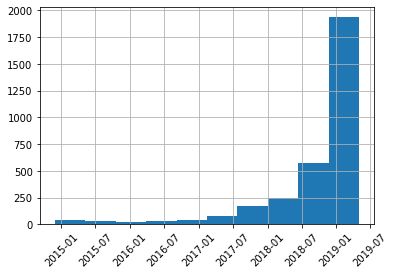

In [104]:
data[data['days_exposition'].isna()]['first_day_exposition'].hist()
plt.xticks(rotation=45);

Столбец *locality_name* - название населённого пункта также имеет пропуски. Заполним их *Unknown*. Об этой ошибке также следует сообщить специалисту по выгрузке.

In [22]:
data['locality_name'] = data['locality_name'].fillna('Unknown')

Нерассмотренными остались столбцы *airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest*. Эту информацию не редко забывают указать, считая, что она не так важно. Поэтому пропуске в данных скорее всего связаны не с ошибками, а с отстувием этой информации.

Данные в столбце *first_day_exposition* - дата публикации сейчас указаны в не очень удобном для восриятия и работы формате. Переведем их в формат даты.

In [23]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Создадим столбец *last_price_mln* для стоимости квартиры в млн рублей (для лучшего восприятия).

In [24]:
data['last_price_mln'] = data['last_price'] / 1000000

И последнее, что нам следует сделать - проверить базу данных на наличие дубликатов. К сожалению, у нас нет идентификационного номера, чтоб мы могли проверить дубликаты по нему, поэтому будем искать только полные дубликаты.

In [25]:
data.duplicated().sum()

0

Дубликатов нет, отлично!

Еще раз посмотрим на информацию о данных.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_arou

**Вывод**

Мы закончили предобработку данных, убрали пропуски, где это было возможно, и также поменяли формат данных для лучшего восприятия и более комфортной работы.

Были обнаружены некоторые проблемы с выгрузкой или же качеством первоначальной информации, которые необходимо решить.

## Расчёты и добавление результатов в таблицу

Рассчитаем цену одного квадратного метра квартиры. Добавим столбец *price_sm*.

In [27]:
data['price_sm'] = data['last_price'] / data['total_area']

Добавим столбцы с информацией о дне недели, месяце и годе публикации объявления.

In [28]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

Добавим информацию о соотношении  жилой и общей площади, а также площади кухни к общей.

In [29]:
data['living_area_part'] = data['living_area'] / data['total_area']
data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']

In [30]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,floor_kind,living_area_check,kitchen_area_check,last_price_mln,price_sm,exposition_weekday,exposition_month,exposition_year,living_area_part,kitchen_area_part
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,другое,True,True,13.000,120370.370370,3,3,2019,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,первый,True,True,3.350,82920.792079,1,12,2018,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,другое,True,True,5.196,92785.714286,3,8,2015,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,45.0,9,False,...,другое,False,False,64.900,408176.100629,4,7,2015,0.283019,0.057233
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,другое,True,True,10.000,100000.000000,1,6,2018,0.320000,0.410000


**Вывод**

Мы подготовили данные для дальнейшего анализа.

## Исследовательский анализ данных

Рассмотрим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

Напишем функцию, которая поможет нам строить гистограмы по каждому из параметров. Интервал для построения будем рассчитывать от Q1-3\*IQR до Q3+3\*IQR. 

In [31]:
def hist_options(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    fig, ax = plt.subplots()
    ax.hist(data[column], bins=100, range=(Q1-3*IQR,Q3+3*IQR))
    ax.grid()
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('frequency')

Начнем с площади квартиры.

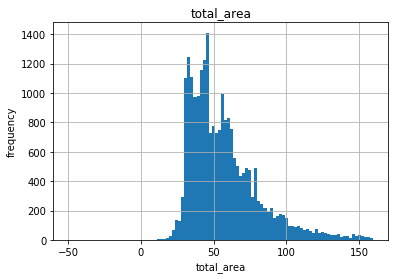

In [32]:
hist_options('total_area')

**Вывод**

Мы можем заметить, что большинство квартир на рынке - это квартиры около 40 квадратных метров. Скорее всего однокомнатные и студии - таких действительно много. Следующий пик - это квартиры около 60 квадратных метров.

Далее рассмотрим цены квартир. 

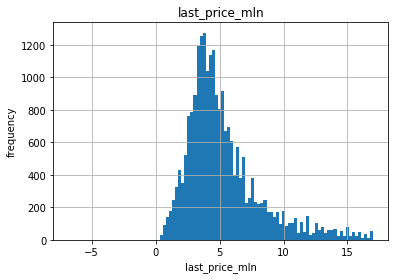

In [33]:
hist_options('last_price_mln')

**Вывод**

Можно сделать вывод, что большинство квартир стоит около 3,5-4 млн рублей. Это хорошо соотносится с тем, что большинство квартир на рынке - небольшие, около 40 квадратных метров.

Теперь рассмотрим количество комнат. Узнаем максимальное число и построим гистограму.

In [34]:
data['rooms'].max()

19

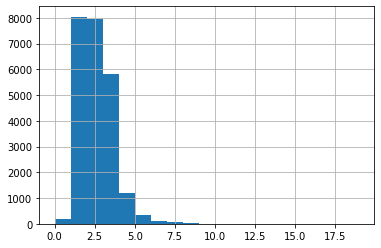

In [35]:
data['rooms'].hist(bins=19, grid=True)

**Вывод**

Видно, что большинство квартир - 1 и 2 комнатные, их количество почти одинаково. Далее с увеличением числа комнат количество квартир резко снижается.

Интересно, что за квартиры с 0 комнат - надо это выяснить.

In [36]:
print('Количество квартир с 0 комнат:', data[data['rooms'] == 0]['rooms'].count())
print('Из них студий', data[data['rooms'] == 0]['studio'].sum())

Количество квартир с 0 комнат: 197
Из них студий 138


Можно было предположить, что все квартиры с 0 комнат - это студии, но оказывается, это не так. Это еще один момент, который необходимо выяснить у коллег.

Рассмотрим высоту потолков квартир. Напомню, что данная информация была предоставлена не по всем квартирам. Будем строить гистограму по тем данным, которые есть.

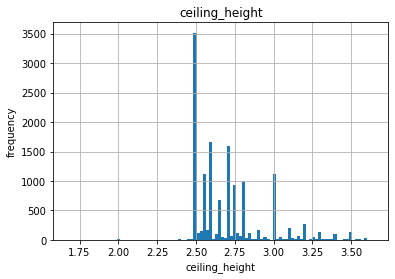

In [37]:
hist_options('ceiling_height')

**Вывод**

Большинство квартир имеет высоту близкую к 2,5 метрам - это достаточно правдоподобное значение. Есть также значения в районе 2 метров - возможно, ошибочные.

Изучим время продажи квартиры. Построим две диаграмы: одну, включающую дозаполненные нами медианные значения, вторую - только по первоначальным данным.

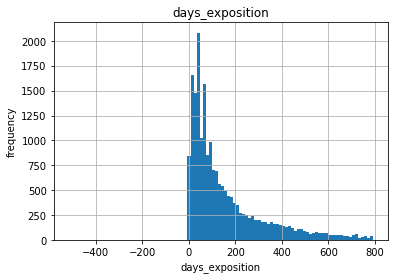

In [38]:
hist_options('days_exposition')

Посчитаем среднее и медиану.

In [39]:
print('Среднее равно', data['days_exposition'].mean())
print('Медиана равна', data['days_exposition'].median())

Среднее равно 180.88863436982163
Медиана равна 95.0


Посмотрим на остальные характеристики выборки.

In [40]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Вывод**

Можно сказать, что если квартира продается дольше, чем за 232 дня - это необычно долгая продажа, если быстрее, чем за 45 - достаточно быстрая.

Половина квартир продается в диапозоне от 45 до 232 дней.

Уберем редкие и выбивающиеся значения.

Начнем с площади квартир. Построим ящик с усами.

In [41]:
def boxplot_options(column):
    fig, ax = plt.subplots()
    ax.boxplot(data[column])
    ax.grid()
    ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(50))
    ax.set_title(column)

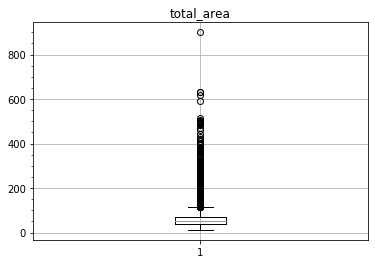

In [42]:
boxplot_options('total_area')

Посмотрим, сколько квартир с метражом более 125 и менее 20 квадратных метров.

In [43]:
data.query('total_area > 125')['total_area'].count()

942

In [44]:
data.query('total_area < 20')['total_area'].count()

27

Квартир метражом более 125 кв.м. около 4 процентов от общего числа. Менее 20 - менее 0,1%. Создадим новый массив данных без этих значений.

In [45]:
data_drop = data.query('20 <= total_area <= 125')

Рассмотрим цены квартир. Построим ящик с усами по новому массиву и отсечем редкие значения.

Text(0.5, 1.0, 'last_price_mln')

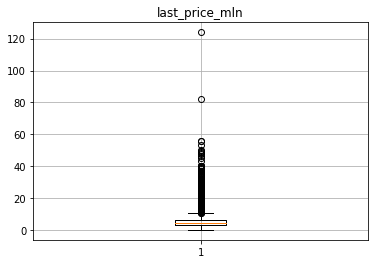

In [46]:
fig, ax = plt.subplots()
ax.boxplot(data_drop['last_price_mln'])
ax.grid()
ax.set_title('last_price_mln')

In [47]:
data_drop.query('last_price_mln > 10')['last_price_mln'].count()

1825

In [48]:
data_drop = data_drop.query('last_price_mln <= 10')

Рассмотри число комнат. Построим ящик с усами по новому массиву и отсечем редкие значения.

Text(0.5, 1.0, 'rooms')

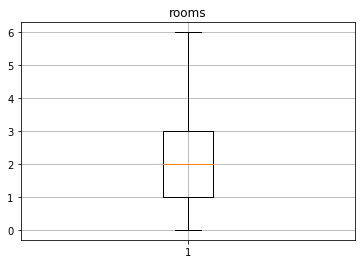

In [49]:
fig, ax = plt.subplots()
ax.boxplot(data_drop['rooms'])
ax.grid()
ax.set_title('rooms')

In [50]:
data_drop.query('rooms > 6')['rooms'].count()

0

Отлично, квартир больше 6 комнат не осталось.

In [51]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20905 entries, 1 to 23698
Data columns (total 32 columns):
total_images            20905 non-null int64
last_price              20905 non-null float64
total_area              20905 non-null float64
first_day_exposition    20905 non-null datetime64[ns]
rooms                   20905 non-null int64
ceiling_height          12605 non-null float64
floors_total            20834 non-null float64
living_area             20905 non-null float64
floor                   20905 non-null int64
is_apartment            20905 non-null bool
studio                  20905 non-null bool
open_plan               20905 non-null bool
kitchen_area            20905 non-null float64
balcony                 20905 non-null int64
locality_name           20905 non-null object
airports_nearest        15433 non-null float64
cityCenters_nearest     15445 non-null float64
parks_around3000        15445 non-null float64
parks_nearest           6327 non-null float64
ponds_arou

**Вывод**

Мы cмогли заметить выбивающиеся значения: слишком большие или же наоборот слишком маленькие, которые могли мешать нам смотреть на картиру в среднем. Избавившись от них мы сможем более корректно рассмотреть все закономерности.

Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Для этого посмотрим на корреляции данных величин.

In [52]:
print('Коэффициент корреляции между ценой и площадью квартиры составляет',
      data_drop['last_price'].corr(data_drop['total_area']))
print('Коэффициент корреляции между ценой и числом комнат составляет',
      data_drop['last_price'].corr(data_drop['rooms']))
print('Коэффициент корреляции между ценой и удаленностью от центра составляет',
      data_drop['last_price'].corr(data_drop['cityCenters_nearest']))

Коэффициент корреляции между ценой и площадью квартиры составляет 0.6626774615363705
Коэффициент корреляции между ценой и числом комнат составляет 0.42422120433616145
Коэффициент корреляции между ценой и удаленностью от центра составляет -0.33614919919052755


Построим графики зависимости вышеперечисленных величин.

Text(0, 0.5, 'last_price')

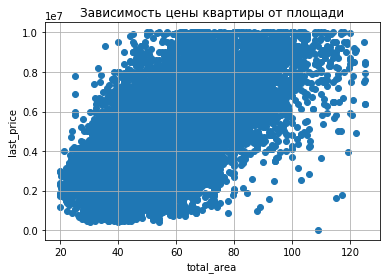

In [53]:
fig, ax = plt.subplots()
plt.scatter(data_drop['total_area'], data_drop['last_price'])
ax.grid()
ax.set_title('Зависимость цены квартиры от площади')
ax.set_xlabel('total_area')
ax.set_ylabel('last_price')

Зависимость действительно похожа на линейную.


Далее рассмотрим зависимость стоимости от числа комнат.

Text(0, 0.5, 'last_price')

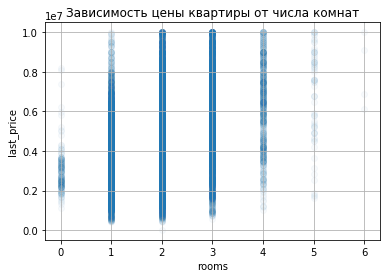

In [54]:
fig, ax = plt.subplots()
plt.scatter(data_drop['rooms'], data_drop['last_price'], alpha=0.03)
ax.grid()
ax.set_title('Зависимость цены квартиры от числа комнат')
ax.set_xlabel('rooms')
ax.set_ylabel('last_price')

Text(0, 0.5, 'last_price')

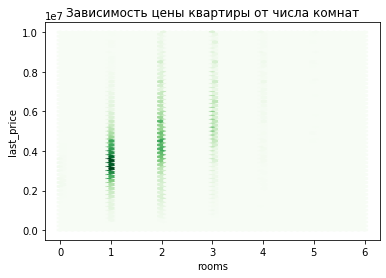

In [55]:
fig, ax = plt.subplots()
plt.hexbin(data_drop['rooms'], data_drop['last_price'], gridsize=(50,50), cmap=plt.cm.Greens)
ax.set_title('Зависимость цены квартиры от числа комнат')
ax.set_xlabel('rooms')
ax.set_ylabel('last_price')

Ситуация с зависимостью цены квартиры от количества комнат иная. В целом можно заметить, что с ростом числа комнат средняя стоимость квартиры растет. Однако например двухкомнатные квартиры есть как очень дешевые, так и очень дорогие. Ясно, что на стоимость влияют и другие показатели, такие как площадь, удаленость от центра и прочее.


Далее рассмотрим зависимость стоимости от удаленности от центра.

Text(0, 0.5, 'last_price')

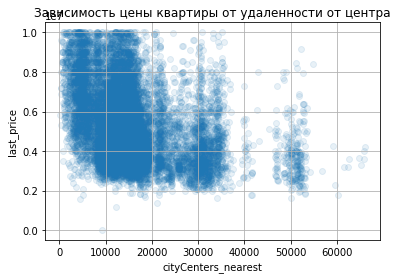

In [56]:
fig, ax = plt.subplots()
plt.scatter(data_drop['cityCenters_nearest'], data_drop['last_price'], alpha=0.1)
ax.grid()
ax.set_title('Зависимость цены квартиры от удаленности от центра')
ax.set_xlabel('cityCenters_nearest')
ax.set_ylabel('last_price')

Text(0, 0.5, 'last_price')

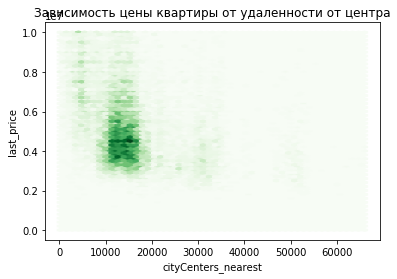

In [57]:
fig, ax = plt.subplots()
plt.hexbin(data_drop['cityCenters_nearest'], data_drop['last_price'], gridsize=(50,50), cmap=plt.cm.Greens)
ax.set_title('Зависимость цены квартиры от удаленности от центра')
ax.set_xlabel('cityCenters_nearest')
ax.set_ylabel('last_price')

В целом вдно, что самые дорогие квариры находятся ближе к центру, а с удалением от центра большая часть квартир становится дешевле. Однако линейной эту зависимость назвать сложно.

**Вывод**:
* корреляция между ценой и площадью квартиры прямая и достаточно высокая - это похоже на правду.
* кореляция между ценой квартиры и количеством комнат тоже есть, но уже не такая сильная. Действительно, бывают квартиры большого размера, но с маленьким количеством комнат.
* Корреляция между ценой и удаленностью от центра также есть, небольшая и отрицательная. Это значит, что чем дальше квартира от центра, тем она дешевле, что тоже достаточно логично.

Однако, если посмотреть на графики взаимодействия, мы можем заметить, что зависимость стоимости от количества комнат и удаленности от центра сложно назвать линейой.

Изучим влияние этажа квартиры (первый, последний, другой) на стоимость квартиры. Для этого посотроим гистограмы цены на одном графике.

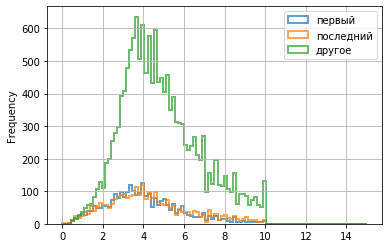

In [58]:
data_drop_first = data_drop.query('floor_kind == "первый"')
data_drop_last = data_drop.query('floor_kind == "последний"')
data_drop_other = data_drop.query('floor_kind == "другое"')

ax = data_drop_first.plot(
    kind='hist',
    y='last_price_mln',
    histtype='step',
    range=(0, 15),
    bins=100,
    linewidth=2,
    alpha=0.7,
    label='первый',
)
data_drop_last.plot(
    kind='hist',
    y='last_price_mln',
    histtype='step',
    range=(0, 15),
    bins=100,
    linewidth=2,
    alpha=0.7,
    label='последний',
    ax=ax,
    grid=True,
    legend=True,
)
data_drop_other.plot(
    kind='hist',
    y='last_price_mln',
    histtype='step',
    range=(0, 15),
    bins=100,
    linewidth=2,
    alpha=0.7,
    label='другое',
    ax=ax,
    grid=True,
    legend=True,
)


По графику видно, что в целом, квартиры на последнем этаже стоят больше квартир на первом (график немного смещен вправо). Сравнить с остальными этажами проблематично. поэтому посмотрим на медианные значения.

In [59]:
print('Медианная цена квартир на первом этаже', data_drop_first['last_price'].median())
print('Медианная цена квартир на последнем этаже', data_drop_last['last_price'].median())
print('Медианная цена квартир на других этажах', data_drop_other['last_price'].median())

Медианная цена квартир на первом этаже 3800000.0
Медианная цена квартир на последнем этаже 3990000.0
Медианная цена квартир на других этажах 4500000.0


**Вывод**

По этим данным можно сказать, что в среднем квартиры не на первом и не на последнем этажах стоят дороже. Самые дешевые квартиры - на первом этаже.

Отсортируем виды квартир по нашему предположительному росту цен и создади столбец *floor_kind_sorted*, где первый этаж - 0, последний этаж - 1, другой этаж - 2 и посмотрим корреляцию.

In [60]:
def floor_kind_sort(row):
    if row['floor_kind'] == 'первый':
        return(0)
    if row['floor_kind'] == 'последний':
        return(1)
    return(2)

data_drop['floor_kind_sorted'] = data_drop.apply(floor_kind_sort, axis=1)

data_drop['last_price'].corr(data_drop['floor_kind_sorted'])

0.1519349716748001

Можем заметить, что корреляция очень слабая.

In [108]:
def floor_kind_sort(row):
    if row['floor_kind'] == 'первый':
        return(0)
    if row['floor_kind'] == 'последний':
        return(-1000000)
    return(200000)

data_drop['floor_kind_sorted'] = data_drop.apply(floor_kind_sort, axis=1)

data_drop['last_price'].corr(data_drop['floor_kind_sorted'])

0.0985235523260662

Посмотрим зависимости от дней недели и месяца.

In [61]:
for i in range(7):
    print(i, data_drop.query('exposition_weekday == @i')['last_price'].median())

0 4350000.0
1 4350000.0
2 4400000.0
3 4300000.0
4 4300000.0
5 4300000.0
6 4300000.0


In [63]:
data_drop.groupby('exposition_month')['last_price'].median()

exposition_month
1     4325000.0
2     4300000.0
3     4350000.0
4     4500000.0
5     4300000.0
6     4150000.0
7     4300000.0
8     4300000.0
9     4300000.0
10    4300000.0
11    4400000.0
12    4400000.0
Name: last_price, dtype: float64

Построим графики.

Text(0, 0.5, 'last_price')

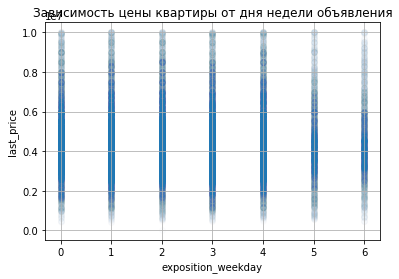

In [64]:
fig, ax = plt.subplots()
plt.scatter(data_drop['exposition_weekday'], data_drop['last_price'], alpha=0.01)
ax.grid()
ax.set_title('Зависимость цены квартиры от дня недели объявления')
ax.set_xlabel('exposition_weekday')
ax.set_ylabel('last_price')

Text(0, 0.5, 'last_price')

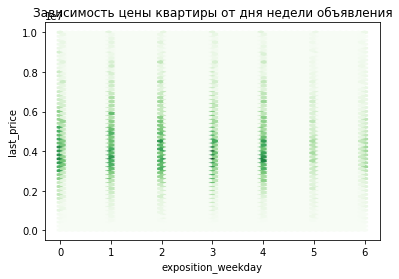

In [65]:
fig, ax = plt.subplots()
plt.hexbin(data_drop['exposition_weekday'], data_drop['last_price'], gridsize=(50,50), cmap=plt.cm.Greens)
ax.set_title('Зависимость цены квартиры от дня недели объявления')
ax.set_xlabel('exposition_weekday')
ax.set_ylabel('last_price')

Видно, что зависимости стоимости квартир от дня недели объявления, нет. Однако, по этим графикам можно сказать, что в субботу и воскресенье объявлений меньше всего - никто не любит заниматься делами и работать в выходные.

Text(0, 0.5, 'last_price')

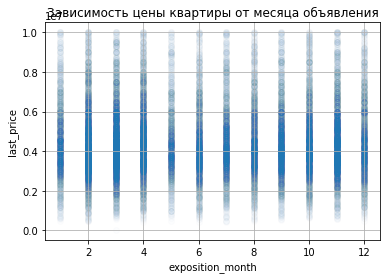

In [66]:
fig, ax = plt.subplots()
plt.scatter(data_drop['exposition_month'], data_drop['last_price'], alpha=0.01)
ax.grid()
ax.set_title('Зависимость цены квартиры от месяца объявления')
ax.set_xlabel('exposition_month')
ax.set_ylabel('last_price')

Text(0, 0.5, 'last_price')

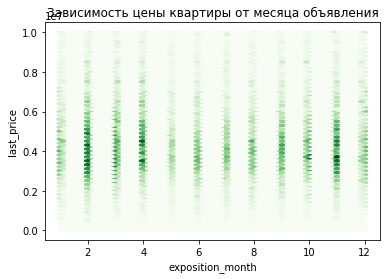

In [67]:
fig, ax = plt.subplots()
plt.hexbin(data_drop['exposition_month'], data_drop['last_price'], gridsize=(50,50), cmap=plt.cm.Greens)
ax.set_title('Зависимость цены квартиры от месяца объявления')
ax.set_xlabel('exposition_month')
ax.set_ylabel('last_price')

По графикам можно сказать, что во-первых, летом появляется существенно меньше объявлений, и во-вторых, в среднем квартиры становятся дешевле. 

**Вывод**

От дня недели стоимость квартиры явно не зависит. А вот если смотреть на месяц - можно заметить, что летом квартиры несколько проседают в цене а к концу года снова растут.

Посмотрим зависимость по годам. Для начала посмотрим, за какие годы у нас представлены квартиры, и рассмотрим медианные значения по годам.

In [68]:
print(data_drop['exposition_year'].min())
print(data_drop['exposition_year'].max())

2014
2019


In [69]:
for i in range(2014,2020):
    print(i, data_drop.query('exposition_year == @i')['last_price'].median())

2014 5320000.0
2015 4700000.0
2016 4250000.0
2017 4200000.0
2018 4300000.0
2019 4700000.0


Text(0, 0.5, 'last_price')

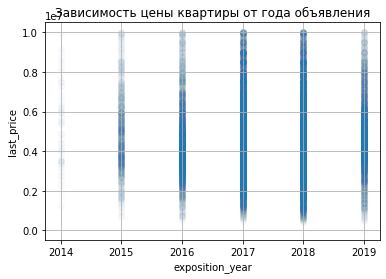

In [70]:
fig, ax = plt.subplots()
plt.scatter(data_drop['exposition_year'], data_drop['last_price'], alpha=0.01)
ax.grid()
ax.set_title('Зависимость цены квартиры от года объявления')
ax.set_xlabel('exposition_year')
ax.set_ylabel('last_price')

Text(0, 0.5, 'last_price')

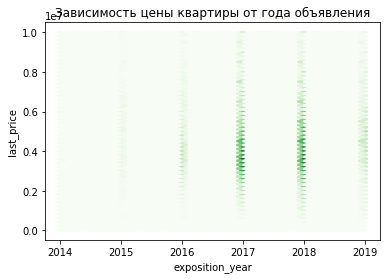

In [71]:
fig, ax = plt.subplots()
plt.hexbin(data_drop['exposition_year'], data_drop['last_price'], gridsize=(50,50), cmap=plt.cm.Greens)
ax.set_title('Зависимость цены квартиры от года объявления')
ax.set_xlabel('exposition_year')
ax.set_ylabel('last_price')

**Вывод**

Можно заметить, что стоимость с 2014 до 2016 существенно снизилась, а потом начался небольшой рост.

По графикам видно, что в 2014-2015 годах было очень мало объявлений. Поэтому однозначно сказать, что стоимость квартир упала, сложно, возможно, выставлялись только дорогие квартиры. С 2016 года в целом заметен рост стоимости.

Рассмотрим 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья

In [72]:
data_drop_locality = data_drop.groupby('locality_name').agg({'price_sm': ['count', 'mean']})

In [73]:
data_drop_locality.columns = ['count', 'price_sm']

In [74]:
data_drop_locality.sort_values('count', ascending=False).head(10)

,count,price_sm
locality_name,,
Санкт-Петербург,13061,104382.988260
посёлок Мурино,522,85752.189195
посёлок Шушары,436,78587.957802
Всеволожск,393,66863.999911
Колпино,335,75221.876295
Пушкин,330,99911.673943
посёлок Парголово,326,90332.263023
Гатчина,303,68664.035870
деревня Кудрово,297,92392.915308


In [75]:
data_drop_locality = data_drop_locality.sort_values('count', ascending=False).loc[:'Выборг']

In [76]:
print('Населенный пункт с самой низкой стоимостью жилья',
      data_drop_locality[data_drop_locality['price_sm'] == data_drop_locality['price_sm'].min()])
print('Населенный пункт с самой высокой стоимостью жилья',
      data_drop_locality[data_drop_locality['price_sm'] == data_drop_locality['price_sm'].max()])

Населенный пункт с самой низкой стоимостью жилья                count      price_sm
locality_name                     
Выборг           232  58229.729406
Населенный пункт с самой высокой стоимостью жилья                  count      price_sm
locality_name                       
Санкт-Петербург  13061  104382.98826


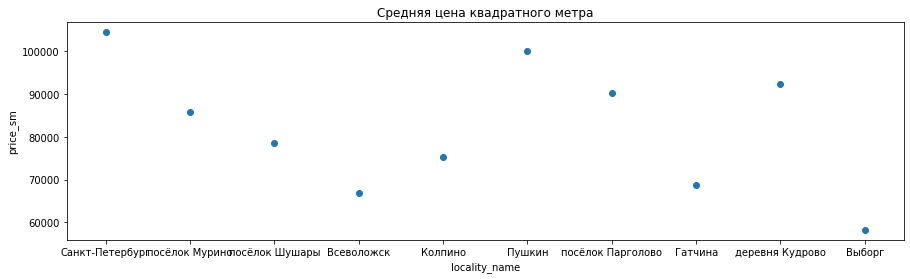

In [77]:
fig, ax = plt.subplots()
plt.scatter(data_drop_locality.index, data_drop_locality['price_sm'])
ax.set_title('Средняя цена квадратного метра')
ax.set_xlabel('locality_name')
ax.set_ylabel('price_sm')
fig.set_figwidth(15)

**Вывод**

Самые дорогие квартиры - в Санкт-Петербурге, самые дешевые - в Выборге

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге и выясним, какая область входит в центр. Для этого создадим столбец с округленным расстоянием до центра в километрах, посчитаем среднюю цену для каждого километра.

Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

In [78]:
data_drop_SPb = data_drop.query('locality_name == "Санкт-Петербург"')
data_drop_SPb = data_drop.query('cityCenters_nearest > 0')
data_drop_SPb['cityCenters_nearest_km'] = data_drop_SPb['cityCenters_nearest'] / 1000
data_drop_SPb['cityCenters_nearest_km'] = data_drop_SPb['cityCenters_nearest_km'].astype('int')
pd.set_option('chained_assignment', None)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [79]:
data_drop_SPb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15445 entries, 1 to 23693
Data columns (total 34 columns):
total_images              15445 non-null int64
last_price                15445 non-null float64
total_area                15445 non-null float64
first_day_exposition      15445 non-null datetime64[ns]
rooms                     15445 non-null int64
ceiling_height            9689 non-null float64
floors_total              15384 non-null float64
living_area               15445 non-null float64
floor                     15445 non-null int64
is_apartment              15445 non-null bool
studio                    15445 non-null bool
open_plan                 15445 non-null bool
kitchen_area              15445 non-null float64
balcony                   15445 non-null int64
locality_name             15445 non-null object
airports_nearest          15433 non-null float64
cityCenters_nearest       15445 non-null float64
parks_around3000          15445 non-null float64
parks_nearest        

In [80]:
SPb_pivot = data_drop_SPb.pivot_table(index='cityCenters_nearest_km', values='price_sm', aggfunc='mean')
SPb_pivot

,price_sm
cityCenters_nearest_km,
0,113866.383118
1,112035.722553
2,110781.039216
3,108398.074161
4,117385.365300
...,...
60,56250.000000
61,60606.060606
62,65807.235421


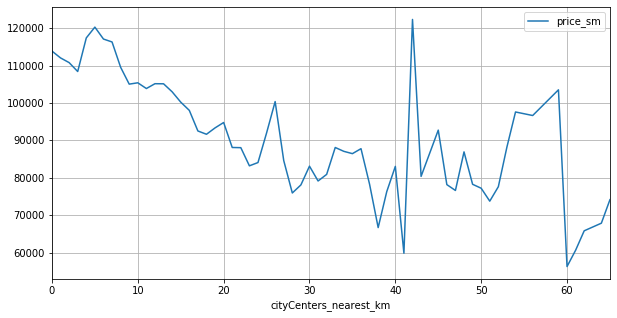

In [81]:
SPb_pivot.plot(y='price_sm', style='-', figsize=(10, 5), grid=True)

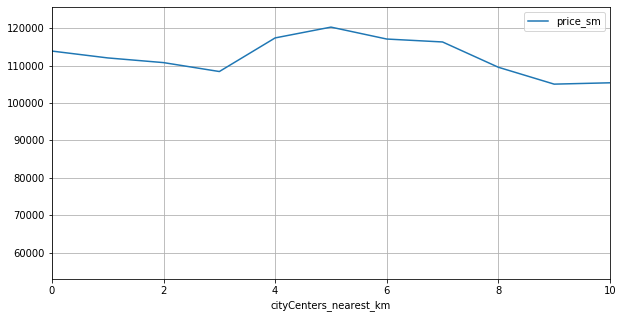

In [82]:
SPb_pivot.plot(y='price_sm', style='-', figsize=(10, 5), grid=True, xlim=(0,10))

Видно, что после 3 клилометров график сильно меняется. Ограничим центр этим расстоянием.

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [83]:
data_SPb_Center = data_drop_SPb.query('cityCenters_nearest_km < 3')

In [84]:
data_SPb_Center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 24 to 23602
Data columns (total 34 columns):
total_images              308 non-null int64
last_price                308 non-null float64
total_area                308 non-null float64
first_day_exposition      308 non-null datetime64[ns]
rooms                     308 non-null int64
ceiling_height            210 non-null float64
floors_total              308 non-null float64
living_area               308 non-null float64
floor                     308 non-null int64
is_apartment              308 non-null bool
studio                    308 non-null bool
open_plan                 308 non-null bool
kitchen_area              308 non-null float64
balcony                   308 non-null int64
locality_name             308 non-null object
airports_nearest          308 non-null float64
cityCenters_nearest       308 non-null float64
parks_around3000          308 non-null float64
parks_nearest             243 non-null float64
ponds_arou

Напишем функцию, которая поможет построить нам гистограмы параметров и изучим результаты. 

In [85]:
def hist_options_SPb(column):
    Q1 = data_SPb_Center[column].quantile(0.25)
    Q3 = data_SPb_Center[column].quantile(0.75)
    IQR = Q3 - Q1
    fig, ax = plt.subplots()
    ax.hist(data_SPb_Center[column], bins=30, range=(Q1-3*IQR,Q3+3*IQR))
    ax.grid()
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('frequency')

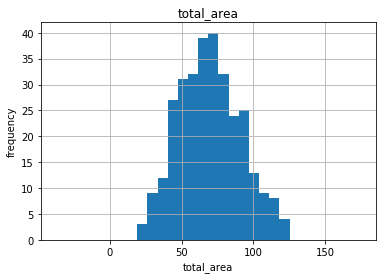

In [86]:
hist_options_SPb('total_area')

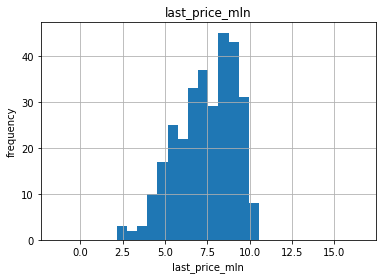

In [87]:
hist_options_SPb('last_price_mln')

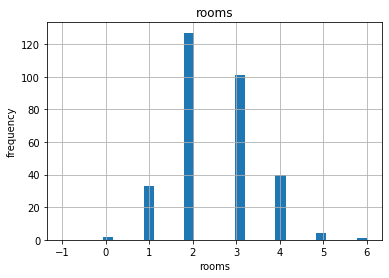

In [88]:
hist_options_SPb('rooms')

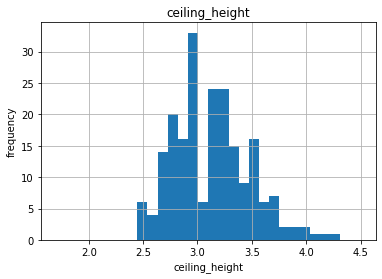

In [89]:
hist_options_SPb('ceiling_height')

Можно заметить следующее:
* увеличился метраж квартир - теперь чаще всего всречаются квартиры около 70 квадратов.
* также выросла стоимость - теперь она чаще всего составляет около 8-9 млн рублей
* однокомнатных квартир почти нет - в основном все квартиры двух- и трех- комнатные
* также почти не осталось квартир с высотой потолков в 2,5 метра, теперь большинство квартир имеет потолки в 3 метра и больше.
    
Скорее всего это связано с тем, что в центре находятся старые дома, которых в общей массе квартир - меньшинство. Ближе к окраинам находится много новых домов с меньшими площадями и иным подходом к строительству.


Посмотрим на корреляцию цены квартиры и площади, числа комнат, удалённости от центра

In [90]:
print('Коэффициент корреляции между ценой и площадью квартиры составляет',
      data_SPb_Center['last_price'].corr(data_SPb_Center['total_area']))
print('Коэффициент корреляции между ценой и числом комнат составляет',
      data_SPb_Center['last_price'].corr(data_SPb_Center['rooms']))
print('Коэффициент корреляции между ценой и удаленностью от центра составляет',
      data_SPb_Center['last_price'].corr(data_SPb_Center['cityCenters_nearest']))

Коэффициент корреляции между ценой и площадью квартиры составляет 0.7014951805026326
Коэффициент корреляции между ценой и числом комнат составляет 0.5602468333214332
Коэффициент корреляции между ценой и удаленностью от центра составляет -0.1442703741400261


Text(0, 0.5, 'last_price')

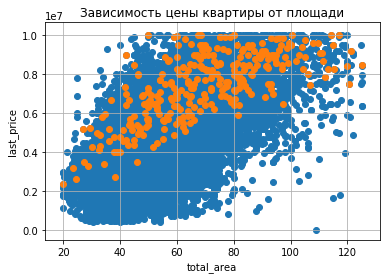

In [91]:
fig, ax = plt.subplots()
plt.scatter(data_drop['total_area'], data_drop['last_price'])
plt.scatter(data_SPb_Center['total_area'], data_SPb_Center['last_price'])
ax.grid()
ax.set_title('Зависимость цены квартиры от площади')
ax.set_xlabel('total_area')
ax.set_ylabel('last_price')

Можно заметить, что в целом картина между всеми квартирами и квартирами в центре Петербурга схожа, однако стоимость квартир в центре Питера в среднем выше (график смещен вверх).


Text(0, 0.5, 'last_price')

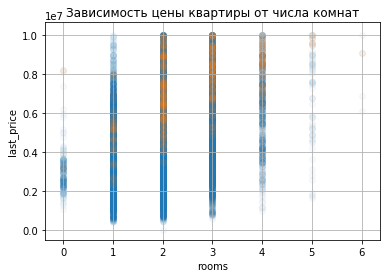

In [92]:
fig, ax = plt.subplots()
plt.scatter(data_drop['rooms'], data_drop['last_price'], alpha=0.03)
plt.scatter(data_SPb_Center['rooms'], data_SPb_Center['last_price'], alpha=0.1)
ax.grid()
ax.set_title('Зависимость цены квартиры от числа комнат')
ax.set_xlabel('rooms')
ax.set_ylabel('last_price')

Картины распределений также похожы, оданко и тут очевидно, что в среднем стоимость квартир в центре существенно выше.

Text(0, 0.5, 'last_price')

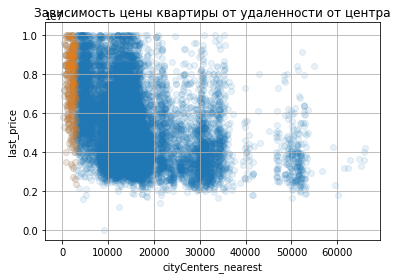

In [93]:
fig, ax = plt.subplots()
plt.scatter(data_drop['cityCenters_nearest'], data_drop['last_price'], alpha=0.1)
plt.scatter(data_SPb_Center['cityCenters_nearest'], data_SPb_Center['last_price'], alpha=0.1)
ax.grid()
ax.set_title('Зависимость цены квартиры от удаленности от центра')
ax.set_xlabel('cityCenters_nearest')
ax.set_ylabel('last_price')

В данном случае очевидно, что левая часть графика - это квартиры у центра, так что никаких особенных открытий мы не сделаем.

**Вывод**

Можем заметить, что корреляция похожа на общую по всей выборке, но более выраженная. Скорее всего, квартиры из других городов и дальше от центра  вносят в общую картину некоторые сумятицу

Рассмотрим зависимость цены на квартиры от года продажи

In [94]:
for i in range(2014,2020):
    print(i, data_SPb_Center.query('exposition_year == @i')['last_price'].median())

2014 nan
2015 7200000.0
2016 8350000.0
2017 7337500.0
2018 7740000.0
2019 7950000.0


Text(0, 0.5, 'last_price')

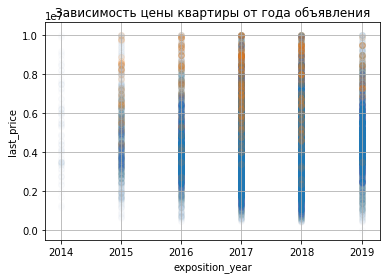

In [95]:
fig, ax = plt.subplots()
plt.scatter(data_drop['exposition_year'], data_drop['last_price'], alpha=0.01)
plt.scatter(data_SPb_Center['exposition_year'], data_SPb_Center['last_price'], alpha=0.1)
ax.grid()
ax.set_title('Зависимость цены квартиры от года объявления')
ax.set_xlabel('exposition_year')
ax.set_ylabel('last_price')

Картина аналогична общей выборке - мы видим снижение цены к 2016-2017 году и затем постепенный рост.

В целом картина опять же схожа с общей, но со смещением цены.

Теперь необходимо посмотреть, имеет ли влияние этаж квартиры на стоимость.

In [96]:
print('Медианная цена квартир на первом этаже', 
      data_SPb_Center.query('floor_kind == "первый"')['last_price'].median())
print('Медианная цена квартир на последнем этаже', 
      data_SPb_Center.query('floor_kind == "последний"')['last_price'].median())
print('Медианная цена квартир на других этажах', 
      data_SPb_Center.query('floor_kind == "другое"')['last_price'].median())

Медианная цена квартир на первом этаже 6350000.0
Медианная цена квартир на последнем этаже 8000000.0
Медианная цена квартир на других этажах 7950000.0


Text(0, 0.5, 'last_price')

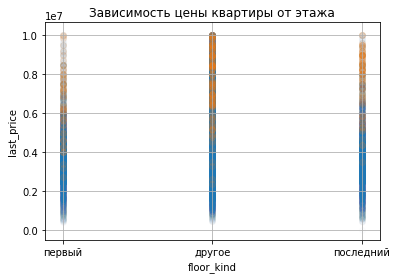

In [97]:
fig, ax = plt.subplots()
plt.scatter(data_drop['floor_kind'], data_drop['last_price'], alpha=0.01)
plt.scatter(data_SPb_Center['floor_kind'], data_SPb_Center['last_price'], alpha=0.1)
ax.grid()
ax.set_title('Зависимость цены квартиры от этажа')
ax.set_xlabel('floor_kind')
ax.set_ylabel('last_price')

Также можно заметить, что обычно самая низкая цена у квартир на первом этаже, далее идут квартиры на последнем этаже, а прочие этажи - самые дорогие.

## Общий вывод

Начнем с ошибок, обнаруженных при анализе данных. Необходимо разобраться, с чем они были связаны и не допускать их в дальнейшем. В некоторых объявлениях отсутствует информация:
* о количестве этажей в здании
* о площади кухни и жилой площади
* о количестве дней, в течение которых размещалось объявление о продаже
* о названии населенного пункта

Также были обнаружены квартиры с количеством комнат, равным 0, но эти квартиры не являлись апартаментами. были указаны квартиры с подозрительной высотой потолков - вплоть до 100 метров.


В результате проведенного анализа данных можно сделать следующие выводы:
* большинство квартир на рынке - это квартиры около 40 квадратных метров. Скорее всего однокомнатные и студии - таких действительно много. Следующий пик - это квартиры около 60 квадратных метров.
* большинство квартир стоит около 3,5-4 млн рублей. Это хорошо соотносится с тем, что большинство квартир на рынке - небольшие, около 40 квадратных метров.
* большинство квартир - 1 и 2 комнатные, их количество почти одинаково. Далее с увеличением числа комнат количество квартир резко снижается.
* большинство квартир имеет высоту близкую к 2,5 метрам. Подавляющее большинство квартир имеет отолки от 2,5 до 3 метров.
* половина квартир продается в диапозоне от 45 до 232 дней. Медианное время продажи составляет 95 дней.
* корреляция между ценой и площадью квартиры прямая и достаточно высокая
* кореляция между ценой квартиры и количеством комнат тоже есть, но уже не такая сильная
* корреляция между ценой и удаленностью от центра также есть, небольшая и отрицательная. Это значит, что чем дальше квартира от центра, тем она дешевле
* обычно квартиры, находящиеся не на первом и не на последнем этажах стоят дороже. Самые дешевые квартиры - на первом этаже.
* зависимости от дня недели начала продажи нет
* если рассмартивать продажу квартир по месяцам - стоимость снижается ближе к лету
* в рассматриваемом промежутке годов от 2014 до 2019 года стоимость квартир существенно снизилась к 2016-2017 годам, потом наблюдался небольшой, но устойчивый рост.
* из городов с наибольшим числом объявлений самые дорогие квартиры - в Санкт-Петербурге, самые дешевые - в Выборге
* квартиры в центре Санкт-Петербурга отличаются от всей выборки. Средний метраж возрос до 70 квадратных метров, большая часть квартир 2 и 3 комнатные, высота потолков выросла до 3-3,5 метров, средняя цена - до 8-9 млн рублей. Распределение зависимоти стоимости квартир от площади, количества комнат, этажа и года продажи похоже на картину по всей выборке.

